# Regression model for dry biomasse assessment

In [1]:
# Import required packages
import numpy as np
np.float = float

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.metrics import mean_squared_error


from sklearn import preprocessing
import joblib
import matplotlib.pyplot as plt

### Fallow sites

In [52]:
# Import input data 
data_B24 = pd.read_excel("./Model_data_completed.xlsx", sheet_name = "B24 Monthly") # Jachèere
data_BZ26 = pd.read_excel("./Model_data_completed.xlsx", sheet_name = "BZ26 Monthly") # Jachèere
data_K6A = pd.read_excel("./Model_data_completed.xlsx", sheet_name = "K6A Monthly") # Jachèere
data_KA10 = pd.read_excel("./Model_data_completed.xlsx", sheet_name = "KA10 Monthly") # Jachèere
data_KA18C = pd.read_excel("./Model_data_completed.xlsx", sheet_name = "KA18C Monthly") # Jachèere
data_KZ7 = pd.read_excel("./Model_data_completed.xlsx", sheet_name = "KZ7 Monthly") # Jachèere
data_TZ22B = pd.read_excel("./Model_data_completed.xlsx", sheet_name = "TZ22B Monthly") # Jachèere

data = pd.concat([data_B24, data_BZ26, data_K6A, data_KA10, data_KA18C, data_KZ7, data_TZ22B])
data = data.reset_index()
data = data.iloc[:, 1:22]
data.shape

(47, 20)

In [40]:
#data = pd.read_excel("./jachere.xlsx", parse_dates=True)
#data.head(2)

In [41]:
# Observed biomass
obs_mass = data["Biomasse (kg/ha)"]
obs_mass.index = data.date
obs_mass.head(1)

date
2019-10-16    776.5
Name: Biomasse (kg/ha), dtype: float64

## Simple LRMs

#### 1. Sites Jachere

#### Model 1:  X = STI

In [42]:
# Define input output data
sti_data = data.iloc[:, [13, 19]]
sti_data.head(2)

,STI,Biomasse (kg/ha)
0,1.156114,776.500
1,1.242927,857.175


In [43]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
RMSE_list = []
mae_list = []
for i in range(0, len(sti_data)):
    X = sti_data[["STI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = sti_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
    X = sti_data[["STI"]]
    y = sti_data["Biomasse (kg/ha)"]    
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]

,coef,cste,R2,RMSE,mae
15,[3304.5476833244306],-3407.551104,0.171901,321.555332,257.925436


In [47]:
# Save the regression model
#joblib.dump(model_1, "./model 1/model_B24.pkl") 

#### 2. Model 2:  X = NDTI

In [102]:
# Define input output data
ndti_data = data.iloc[:, [14, 19]]
ndti_data.head(2)

,NDTI,Biomasse (kg/ha)
0,0.072405,776.500
1,0.108308,857.175


In [103]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
RMSE_list = []
mae_list = []
for i in range(0, len(sti_data)):
    X = ndti_data[["NDTI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    y = ndti_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
    X = ndti_data[["NDTI"]]
    y = ndti_data["Biomasse (kg/ha)"]    
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]

,coef,cste,R2,RMSE,mae
15,[8282.069901477855],-193.499179,0.173506,321.243485,257.361324


In [21]:
# Predict the out var using the best model
model_1 = LinearRegression()
model_1.coef_ = reg_results.coef.values[5]
model_1.intercept_ = reg_results.cste.values[5]

In [22]:
# Save the regression model
#joblib.dump(model_1, "./model 2/model_B24.pkl") 

#### 3. Model 3:  X = DFI

In [104]:
# Define input output data
dfi_data = data.iloc[:, [15, 19]]
dfi_data.head(2)

,DFI,Biomasse (kg/ha)
0,9.959820,776.500
1,13.581307,857.175


In [106]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(dfi_data)):
    X = dfi_data[["DFI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = dfi_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
    X = dfi_data[["DFI"]]
    y = dfi_data["Biomasse (kg/ha)"]    
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)

    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]

,coef,cste,R2,RMSE,mae
39,[-8.820033551695644],719.489313,0.001577,353.078999,299.452682


In [ ]:
# Save the regression model
#joblib.dump(model_1, "./model 3/model_B24.pkl") 

#### 4. Model 4:  X = NDRI

In [107]:
# Define input output data
ndri_data = data.iloc[:, [16, 19]]
ndri_data.head(2)

,NDRI,Biomasse (kg/ha)
0,-0.272779,776.500
1,-0.197771,857.175


In [108]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(ndri_data)):
    X = ndri_data[["NDRI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = ndri_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
    X = ndri_data[["NDRI"]]
    y = ndri_data["Biomasse (kg/ha)"]   
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]

,coef,cste,R2,RMSE,mae
12,[-5739.103128353925],-618.713242,0.274384,301.001139,241.885053


In [63]:
# Save the regression model
#joblib.dump(model_1, "./model 4/model_B24.pkl") 

#### 5. Model 5:  X = [STI, NDTI]

In [109]:
# Define input output data
sti_ndti_data = data.iloc[:, [13,14,19]]
sti_ndti_data.head(2)

,STI,NDTI,Biomasse (kg/ha)
0,1.156114,0.072405,776.500
1,1.242927,0.108308,857.175


In [110]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(sti_ndti_data)):
    X = sti_ndti_data[["STI", "NDTI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = sti_ndti_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)

    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]

,coef,cste,R2,RMSE,mae
43,"[-27840.20049085047, 78647.09613830117]",26807.421133,0.239391,298.103235,233.623815


In [66]:
# Save the regression model
#joblib.dump(model_1, "./model 5/model_B24.pkl") 

#### 6. Model 6:  X = [STI, DFI]

In [111]:
# Define input output data
sti_dfi_data = data.iloc[:, [13,15,19]]
sti_dfi_data.head(2)

,STI,DFI,Biomasse (kg/ha)
0,1.156114,9.959820,776.500
1,1.242927,13.581307,857.175


In [112]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []
for i in range(0, len(sti_dfi_data)):
    X = sti_dfi_data[["STI", "DFI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = sti_dfi_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]

,coef,cste,R2,RMSE,mae
46,"[8562.581623672859, -191.11124597544452]",-7444.38599,0.454325,263.368001,204.526443


In [113]:
model_1 = LinearRegression()
model_1.coef_ = reg_results.coef.values[5]
model_1.intercept_ = reg_results.cste.values[5]

In [114]:
# Save the regression model
#joblib.dump(model_1, "./model 6/model_B24.pkl") 

#### 7. Model 7:  X = [STI, NDRI]

In [115]:
# Define input output data
sti_ndri_data = data.iloc[:, [13,16,19]]
sti_ndri_data.head(2)

,STI,NDRI,Biomasse (kg/ha)
0,1.156114,-0.272779,776.500
1,1.242927,-0.197771,857.175


In [116]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(sti_ndri_data)):
    X = sti_ndri_data[["STI", "NDRI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = sti_ndri_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]

,coef,cste,R2,RMSE,mae
20,"[2407.8544936919557, -5259.746025709622]",-3459.246861,0.411205,265.451849,212.691261


In [117]:
model_1 = LinearRegression()
model_1.coef_ = reg_results.coef.values[5]
model_1.intercept_ = reg_results.cste.values[5]

In [120]:
# Save the regression model
#joblib.dump(model_1, "./model 7/model_B24.pkl")

#### 8. Model 8:  X = [NDTI, DFI]

In [121]:
# Define input output data
ndti_dfi_data = data.iloc[:, [14,15,19]]
ndti_dfi_data.head(2)

,NDTI,DFI,Biomasse (kg/ha)
0,0.072405,9.959820,776.500
1,0.108308,13.581307,857.175


In [122]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(ndti_dfi_data)):
    X = ndti_dfi_data[["NDTI", "DFI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = ndti_dfi_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]    

,coef,cste,R2,RMSE,mae
46,"[21584.83680923437, -193.45640752969436]",900.356115,0.46129,261.681946,202.707061


### Plot the results

In [ ]:
X = sti_ndti_dfi_ndri_data[["NDTI", "DFI"]]
y = sti_ndti_dfi_ndri_data["Biomasse (kg/ha)"]
y_predicted = (model_1.predict(X))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (4,2.2))
ax.plot(np.arange(1, 28, 1), y, lw = .9, label = "Observed dry biomass")
ax.plot(np.arange(1, 28, 1), y_predicted, lw = .9, label = "Estimated dry biomass")

ax.set_xticks(np.arange(1, 28, 2))
ax.set_yticks(np.arange(0, 15000, 2000))
ax.set_ylabel("Biomasse (kg/ha)", fontsize = 7)
ax.set_xlabel("Index",  fontsize = 7)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.legend(fontsize = 7)
ax.set_title("Fallow \n Model 8", fontsize = 8, fontweight = "bold", x = 0.55, y = .45)
ax.grid("both", alpha = 0.2)
plt.tight_layout()
plt.savefig("./model_8_jachere.png", dpi = 600)


In [ ]:
# Save the regression model
#joblib.dump(model_1, "./model 8/model_B24.pkl") 

#### 9. Model 9:  X = [NDTI, NDRI]

In [82]:
# Define input output data
ndti_ndri_data = data.iloc[:, [14,16,19]]
ndti_ndri_data.head(2)

,NDTI,NDRI,Biomasse (kg/ha)
0,0.072405,-0.272779,776.500
1,0.108308,-0.197771,857.175


In [83]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(ndti_ndri_data)):
    X = ndti_ndri_data[["NDTI", "NDRI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = ndti_ndri_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]    

,coef,cste,R2,RMSE,mae
20,"[6043.593997443177, -5260.075968452425]",-1118.269202,0.412426,265.176485,212.551114


In [ ]:
model_1 = LinearRegression()
model_1.coef_ = reg_results.coef.values[4]
model_1.intercept_ = reg_results.cste.values[4]

In [ ]:
# Save the regression model
#joblib.dump(model_1, "./model 9/model_B24.pkl") 

#### 10. Model 10:  X = [DFI, NDRI]

In [84]:
# Define input output data
dfi_ndri_data = data.iloc[:, [15,16,19]]
dfi_ndri_data.head(2)

,DFI,NDRI,Biomasse (kg/ha)
0,9.959820,-0.272779,776.500
1,13.581307,-0.197771,857.175


In [85]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(dfi_ndri_data)):
    X = dfi_ndri_data[["DFI", "NDRI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = dfi_ndri_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]       

,coef,cste,R2,RMSE,mae
6,"[35.964623941416605, -6910.628735309307]",-1325.830535,0.36148,278.458967,225.697106


In [ ]:
model_1 = LinearRegression()
model_1.coef_ = reg_results.coef.values[4]
model_1.intercept_ = reg_results.cste.values[4]

In [ ]:
# Save the regression model
#joblib.dump(model_1, "./model 10/model_B24.pkl") 

#### 11. Model 11:  X = [STI, NDTI, DFI]

In [86]:
# Define input output data
sti_ndti_dfi_data = data.iloc[:, [13, 14, 15,19]]
sti_ndti_dfi_data.head(2)

,STI,NDTI,DFI,Biomasse (kg/ha)
0,1.156114,0.072405,9.959820,776.500
1,1.242927,0.108308,13.581307,857.175


In [87]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(sti_ndti_dfi_data)):
    X = sti_ndti_dfi_data[["STI", "NDTI", "DFI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = sti_ndti_dfi_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]       

,coef,cste,R2,RMSE,mae
46,"[-34266.41820026823, 107236.53725259977, -196....",34287.560039,0.473619,258.670101,197.535691


In [ ]:
reg_results.coef.values[5]

In [ ]:
# Save the regression model
#joblib.dump(model_1, "./model 11/model_B24.pkl") 

#### 12. Model 12:  X = [STI, NDTI, NDRI]

In [90]:
# Define input output data
sti_ndti_ndri_data = data.iloc[:, [13, 14, 16,19]]
sti_ndti_ndri_data.head(2)

,STI,NDTI,NDRI,Biomasse (kg/ha)
0,1.156114,0.072405,-0.272779,776.500
1,1.242927,0.108308,-0.197771,857.175


In [91]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(sti_ndti_ndri_data)):
    X = sti_ndti_ndri_data[["STI","NDTI", "NDRI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = sti_ndti_ndri_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]          

,coef,cste,R2,RMSE,mae
20,"[-21744.082979406143, 60243.91253243561, -5310...",20048.357655,0.41763,263.999447,211.567457


In [ ]:
# Save the regression model
#joblib.dump(model_1, "./model 12/model_B24.pkl") 

#### 13. Model 13:  X = [STI, DFI, NDRI]

In [92]:
# Define input output data
sti_dfi_ndri_data = data.iloc[:, [13, 15, 16,19]]
sti_dfi_ndri_data.head(2)

,STI,DFI,NDRI,Biomasse (kg/ha)
0,1.156114,9.959820,-0.272779,776.500
1,1.242927,13.581307,-0.197771,857.175


In [93]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(sti_dfi_ndri_data)):
    X = sti_dfi_ndri_data[["STI","DFI", "NDRI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = sti_dfi_ndri_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]         

,coef,cste,R2,RMSE,mae
46,"[6932.192265571606, -141.8426811053334, -2405....",-6581.242688,0.477543,257.704228,200.147785


In [ ]:
# Save the regression model
#joblib.dump(model_1, "./model 13/model_B24.pkl") 

#### 14. Model 14:  X = [NDTI, DFI, NDRI]

In [94]:
# Define input output data
ndti_dfi_ndri_data = data.iloc[:, [14, 15, 16,19]]
ndti_dfi_ndri_data.head(2)

,NDTI,DFI,NDRI,Biomasse (kg/ha)
0,0.072405,9.959820,-0.272779,776.500
1,0.108308,13.581307,-0.197771,857.175


In [95]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(ndti_dfi_ndri_data)):
    X = ndti_dfi_ndri_data[["NDTI","DFI", "NDRI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = ndti_dfi_ndri_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]          

,coef,cste,R2,RMSE,mae
46,"[17616.68487141074, -145.3402017090495, -2342....",193.9435,0.483337,256.271275,198.520444


In [ ]:
reg_results.coef.values[5]

In [96]:
model_1 = LinearRegression()
model_1.coef_ = reg_results.coef.values[5]
model_1.intercept_ = reg_results.cste.values[5]

#### 15. Model 15:  X = [STI, NDTI, DFI, NDRI]

In [123]:
# Define input output data
sti_ndti_dfi_ndri_data = data.iloc[:, [13, 14, 15, 16,19]]
sti_ndti_dfi_ndri_data.head(2)

,STI,NDTI,DFI,NDRI,Biomasse (kg/ha)
0,1.156114,0.072405,9.959820,-0.272779,776.500
1,1.242927,0.108308,13.581307,-0.197771,857.175


In [124]:
# Define predictor and response variables
coef_list = []
cste_list = []
R2_list = []
mae_list = []
RMSE_list = []

for i in range(0, len(sti_ndti_dfi_ndri_data)):
    X = sti_ndti_dfi_ndri_data[["STI","NDTI","DFI", "NDRI"]]
    var_out = X.index.isin([i])
    X = X.loc[~var_out]         # Leave one out
    
    y = sti_ndti_dfi_ndri_data["Biomasse (kg/ha)"][X.index] # same indices as X
    
    model_1 = LinearRegression().fit(X, y)
    
    coef = model_1.coef_
    coef_list.append(coef)
    
    cste =  model_1.intercept_
    cste_list.append(cste)
        
    R2 = r2_score(y.values, model_1.predict(X))
    R2_list.append(R2)
    RMSE = mean_squared_error(y.values, model_1.predict(X), squared=False)
    RMSE_list.append(RMSE)
    mae = mean_absolute_error(y.values, model_1.predict(X))
    mae_list.append(mae)
result_dic = {"coef" : coef_list, "cste": cste_list, "R2" : R2_list,"RMSE": RMSE_list, "mae": mae_list}    
reg_results = pd.DataFrame(result_dic)
reg_results.loc[reg_results.RMSE == reg_results.RMSE.min()]          

,coef,cste,R2,RMSE,mae
46,"[-36001.68278867276, 107491.07181576523, -147....",35251.460666,0.496928,252.878117,195.129884


In [125]:
model_1.coef_

array([-36001.68278867, 107491.07181577,   -147.15694503,  -2409.85345595])

In [ ]:
# Save the regression model
import joblib
# save
#joblib.dump(model_1, "./model 15/model_B24.pkl") 

### Plot the results

In [126]:
X = sti_ndti_dfi_ndri_data[["STI","NDTI","DFI", "NDRI"]]
y = sti_ndti_dfi_ndri_data["Biomasse (kg/ha)"][X.index]
y_predicted = model_1.predict(X)

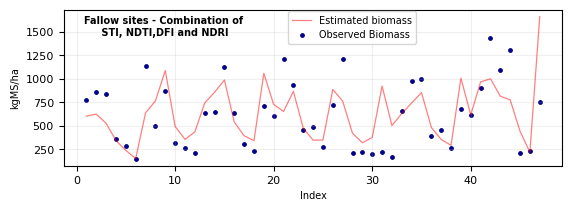

In [132]:
fig, ax = plt.subplots(1, 1, figsize = (5.6,2.), constrained_layout = True)
ax.plot(range(1, 48, 1),y_predicted, lw = .9, label = "Estimated biomass", color = "r", alpha = .5)

ax.scatter(range(1, 48, 1), obs_mass.values, label = "Observed Biomass", color = "darkblue", s = 6)
#ax.set_xticks(sti_data.index)
#ax.set_yticks(np.arange(0, 1500, 200))
ax.set_ylabel("kgMS/ha", fontsize = 7)
ax.set_xlabel("Index",  fontsize = 7)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.legend(fontsize = 7, loc = (0.45, 0.78))
ax.set_title("Fallow sites - Combination of\n STI, NDTI,DFI and NDRI", fontsize = 7, fontweight = "bold", x = 0.2, y = .78)
ax.grid("both", alpha = 0.2)
plt.savefig("./output/jachere_model_15.png", dpi = 600)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (4,2.7))
ax.plot(np.arange(1, 28, 1), y, lw = .9, label = "Observed dry biomass")
ax.plot(np.arange(1, 28, 1), y_predicted, lw = .9, label = "Estimated dry biomass")

#ax.set_xticks(np.arange(1, 26, 2))
ax.set_ylabel("Biomasse (kg/ha)", fontsize = 8)
ax.set_xlabel("Index",  fontsize = 8)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.legend(fontsize = 8)
ax.grid("both", alpha = 0.2)